Kaggle Heart Disease Project

This data contains information about patient attributes and heart disease. The data set is from https://www.kaggle.com/ronitf/heart-disease-uci

Exploratory Data Analysis

Here we explore our data set. What does it look like? Are there missing values or outliers? What features might be related to our target?

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#load the data
df = pd.read_csv('heartdata.csv')

#what is my data structured like?
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We have 14 columns. What do each of these column titles mean?
1. Age in years 
2. Sex (1 = male, 0 = female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl (1=true, 0=false)
7. resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved
9. exercise induced angina (0 = no, 1 = yes)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by fluorosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect (results of blood flow observed)
14. target (1 = NO heart disease, 0= yes heart disease)


In [2]:
#how many rows and columns?
df.shape

(303, 14)

In [3]:
#how is my data distributed?
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#Do we have any null values?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We don't have any null values. 

Let's see if we have any outliers. 

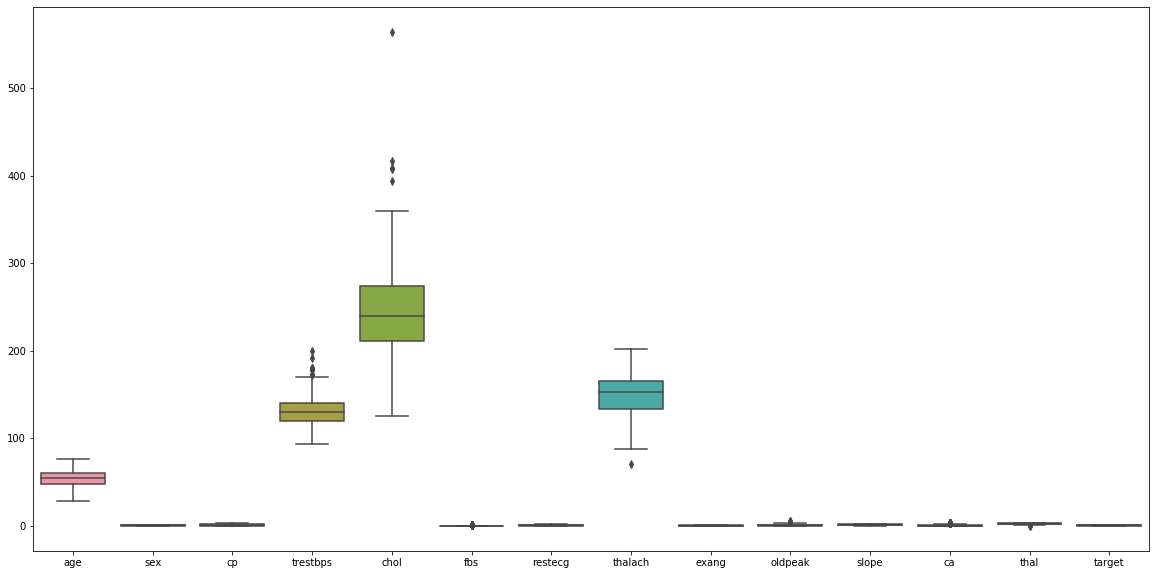

In [5]:
#identify outliers
plt.subplots(figsize=(20,10))
sns.boxplot(data = df)

Cholesterol (feature 5) looks like it has an extreme outlier over 500. Let's remove this sample from our data set. 

In [6]:
#find the entry with cholesterol over 500
df.loc[df['chol'] > 500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [7]:
#remove the entry with outlier
df.drop(df.index[85],inplace=True)
#check to make sure we have 302 rows now 
df.shape

(302, 14)

Let's see if we have a balanced number of men and women in the data set. 

In [8]:
df['sex'].value_counts()

1    207
0     95
Name: sex, dtype: int64

<BarContainer object of 2 artists>

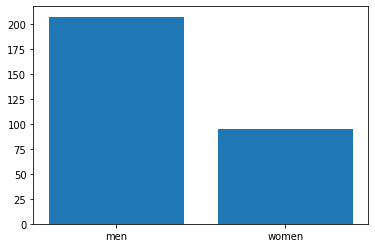

In [9]:
#plot the amount of men and women
df['sex'].value_counts()
x = ['men', 'women']
y= [207, 95]
plt.bar(x,y)

We seem to have about twice as many men in the dataset. 

How many cases of heart disease do we have in our dataset?

In [10]:
#1 means NO heart disease, 0 means they do have heart disease
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<BarContainer object of 2 artists>

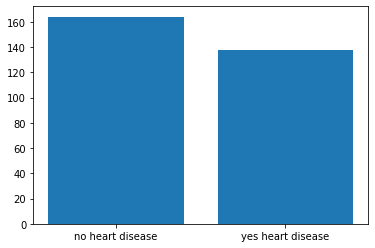

In [11]:
#plot the amount of patients with and without heart disease
df['target'].value_counts()
X = ['no heart disease', 'yes heart disease']
Y= [164, 138]
plt.bar(X,Y)

The target seems fairly balanced.

Let's explore some correlations between features.

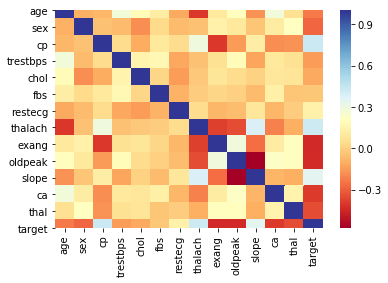

In [15]:
#computer the correlation matrix
correlations = df.corr()

#seaborn correlation heat map
sns.heatmap(correlations,cmap=plt.cm.RdYlBu)

It looks like some features have stronger correlations.

cp (chest pain type), thalach (max heart rate achieved), and slope seem to have some positive correlation with the target. Remember that 1 means NO heart disease. So perhaps these features are associated with being healthier or less likely to have heart disease.

exang (exercise angina), oldpeak, ca (number of major blood vessels), thal (results of bloodflow observed), sex, and age seem to have some negative correlation with the target. These features might be associated with higher likelihood that you have heart disease. 

Some of these features are categorical and some are numerical, so that is also important to keep in mind. 

Let's plot these features one at a time to further examine them. 



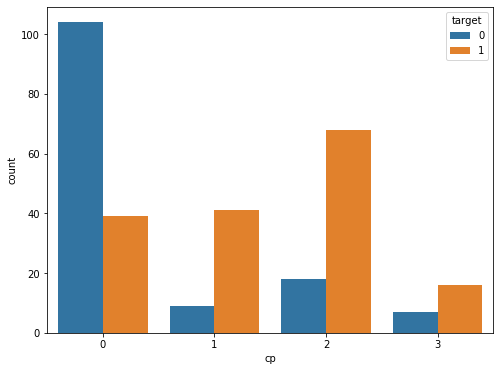

In [16]:
#cp and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

The chest pain has the following categories:
Value 0: asymptomatic, 
Value 1: atypical angina, 
Value 2: pain without relation to angina, 
Value 3: typical angina, 

It looks like many people with heart disease are asymptomatic. 

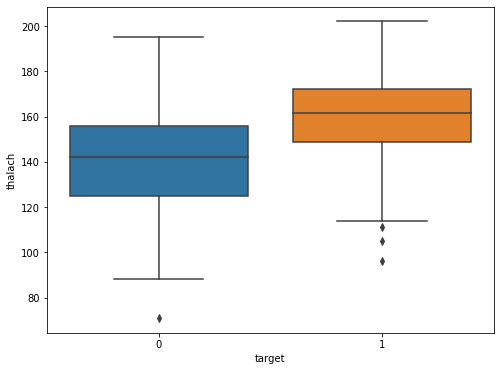

In [33]:
#thalach and target
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()


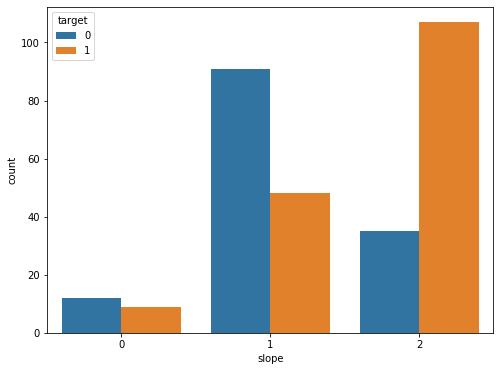

In [24]:
#slope and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="slope", hue="target", data=df)
plt.show()

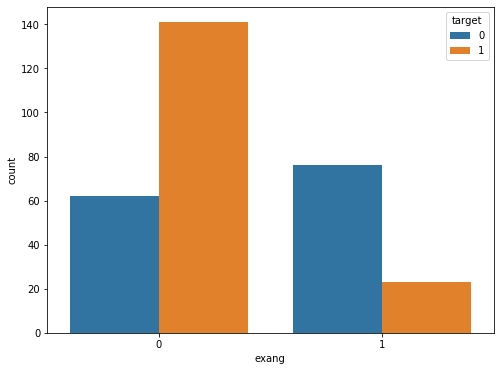

In [25]:
#exang and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="exang", hue="target", data=df)
plt.show()

For exercise induced angina, 0 = no, 1 = yes. Many healthy people did not have exercise induced angina. 

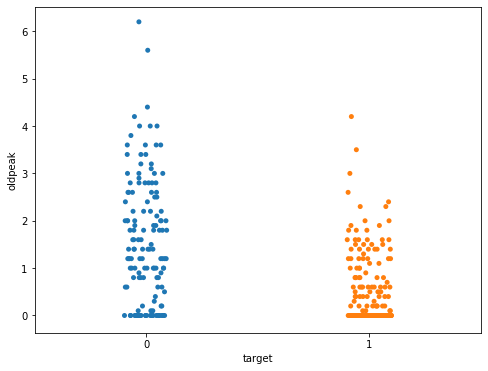

In [27]:
#oldpeak and target
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="oldpeak", data=df)
plt.show()

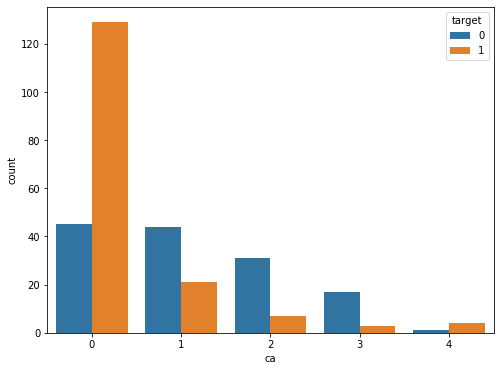

In [28]:
#ca and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="ca", hue="target", data=df)
plt.show()

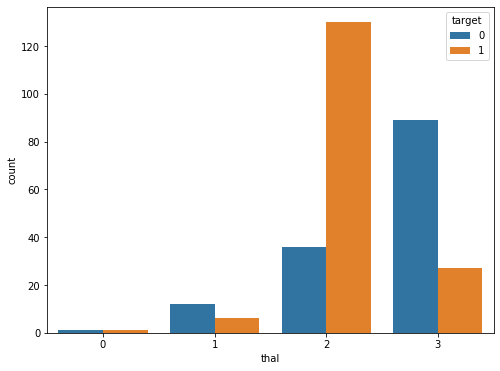

In [29]:
#thal and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="thal", hue="target", data=df)
plt.show()

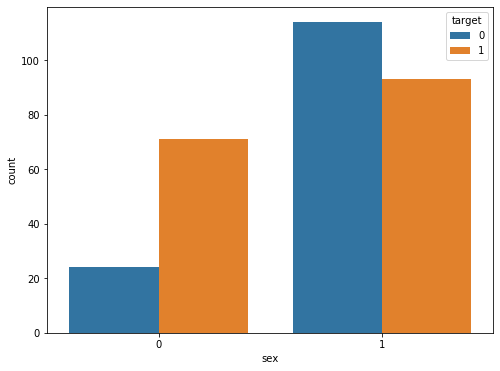

In [30]:
#sex and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

(1 = male, 0 = female)

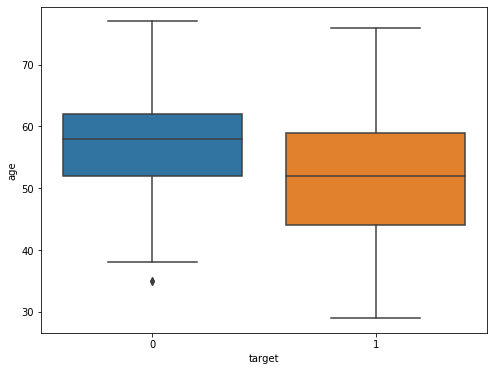

In [32]:
#age and target
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()